In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from IPython.display import Image

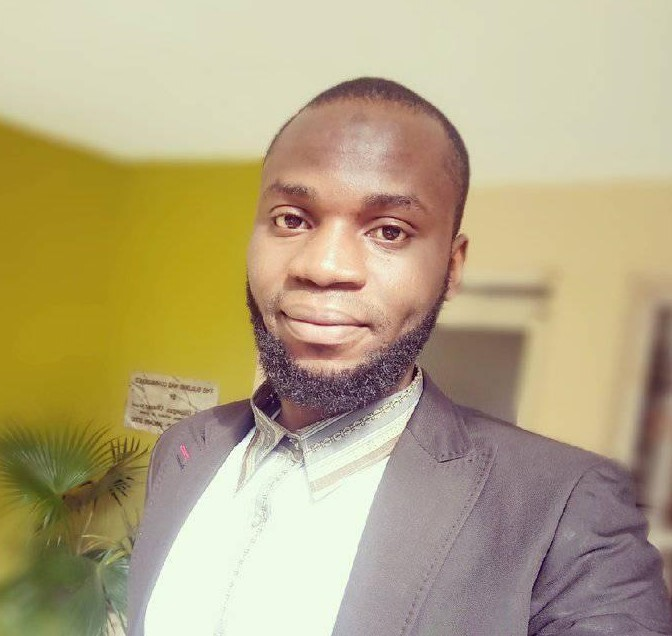

In [10]:
### Original Image
MyPic_bgr = cv2.imread('MyPic.jpg', cv2.IMREAD_COLOR)
MyPic_rgb = cv2.cvtColor(MyPic_bgr, cv2.COLOR_BGR2RGB)

Image(filename = 'MyPic.jpg')

#### Addition or Brightness

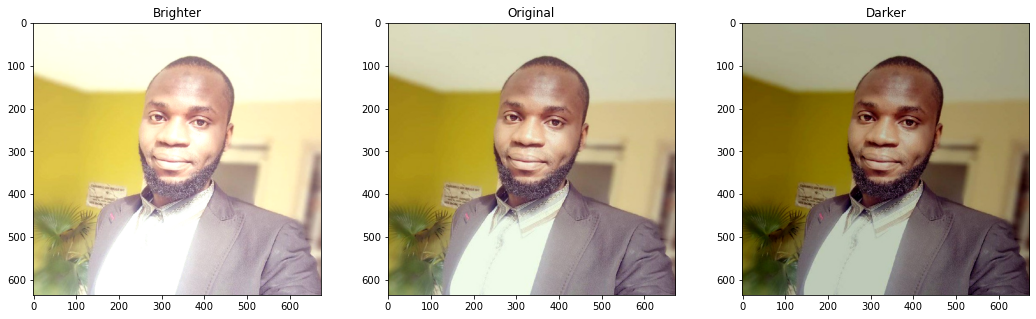

In [16]:
matrix = np.ones(MyPic_rgb.shape, dtype = 'uint8') * 50

MyPic_rgb_brighter = cv2.add(MyPic_rgb, matrix)
MyPic_rgb_darker = cv2.subtract(MyPic_rgb, matrix)

# Show all images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.title('Brighter'); plt.imshow(MyPic_rgb_brighter)
plt.subplot(132); plt.title('Original'); plt.imshow(MyPic_rgb)
plt.subplot(133); plt.title('Darker'); plt.imshow(MyPic_rgb_darker)

#### Multiplication or Constrast

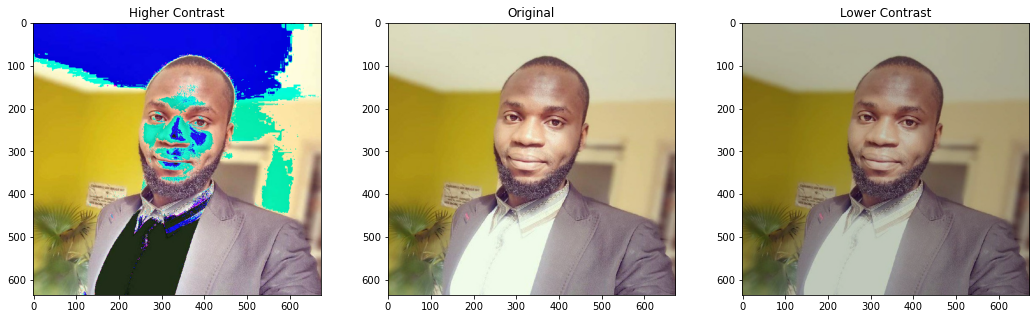

In [19]:
matrix1 = np.ones(MyPic_rgb.shape) * .8
matrix2 = np.ones(MyPic_rgb.shape) * 1.2 # The white background would exceed 255 and cause an overflow

MyPic_rgb_darker = np.uint8(cv2.multiply(np.float64(MyPic_rgb), matrix1))
MyPic_rgb_brighter = np.uint8(cv2.multiply(np.float64(MyPic_rgb), matrix2))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.title('Higher Contrast'); plt.imshow(MyPic_rgb_brighter)
plt.subplot(132); plt.title('Original'); plt.imshow(MyPic_rgb)
plt.subplot(133); plt.title('Lower Contrast'); plt.imshow(MyPic_rgb_darker)

#### Handling Overflow

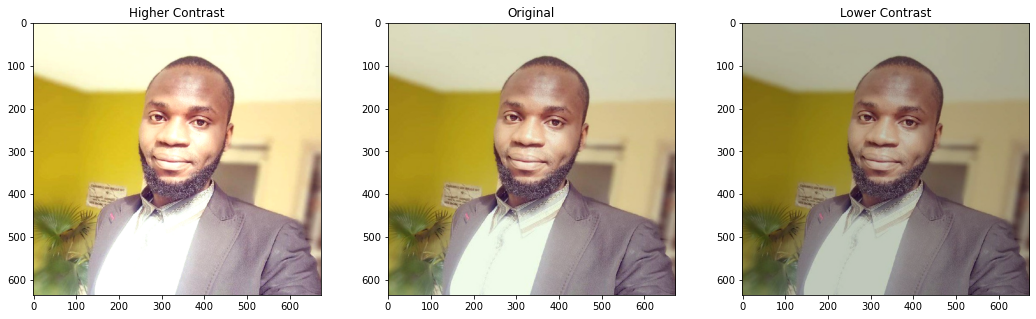

In [20]:
matrix1 = np.ones(MyPic_rgb.shape) * .8
matrix2 = np.ones(MyPic_rgb.shape) * 1.2

MyPic_rgb_darker = np.uint8(cv2.multiply(np.float64(MyPic_rgb), matrix1))
MyPic_rgb_brighter = np.uint8(np.clip(cv2.multiply(np.float64(MyPic_rgb), matrix2), 0,255))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.title('Higher Contrast'); plt.imshow(MyPic_rgb_brighter)
plt.subplot(132); plt.title('Original'); plt.imshow(MyPic_rgb)
plt.subplot(133); plt.title('Lower Contrast'); plt.imshow(MyPic_rgb_darker)

#### Image Thresholding

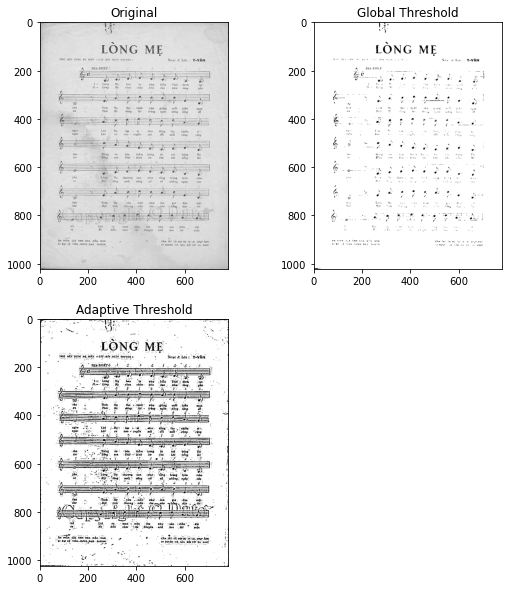

In [65]:
horse = cv2.imread('music.jpg', cv2.IMREAD_GRAYSCALE)

# Global thresholding
retval, horse_threshold = cv2.threshold(horse, 130, 255, cv2.THRESH_BINARY)

# Adaptive thresholding
horse_thres_adaptive = cv2.adaptiveThreshold(horse, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize=[9, 10])
plt.subplot(221); plt.title('Original'); plt.imshow(horse, cmap = 'gray')
plt.subplot(222); plt.title('Global Threshold'); plt.imshow(horse_threshold, cmap = 'gray')
plt.subplot(223); plt.title('Adaptive Threshold'); plt.imshow(horse_thres_adaptive, cmap = 'gray')

#### Bitwise Operation